In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [97]:
hardware = 'SW-088'
engine = 'S118'

In [104]:
def read_and_plot(file_path, correlation_type, hard, eng):
    # Leggi il file di testo
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Leggi l'header e conta gli elementi
    header = lines[0].strip().split(',')
    n = len(header)
    print(n)

    first_data_row = lines[1].strip().split()
    row_length = len(first_data_row)
    
    # Crea un dizionario per memorizzare i dati
    data = {
        'Pearson': np.zeros((n, row_length)),
        'Spearman': np.zeros((n, row_length)),
        'Kendall': np.zeros((n, row_length))
    }
    
    # Leggi i dati Pearson, Spearman e Kendall
    for i in range(1, n+1):
        data['Pearson'][i-1, :] = list(map(float, lines[i].strip().split()))
    for i in range(n+1, 2*n+1):
        data['Spearman'][i-n-1, :] = list(map(float, lines[i].strip().split()))
    for i in range(2*n+1, 3*n+1):
        data['Kendall'][i-2*n-1, :] = list(map(float, lines[i].strip().split()))

    markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']
    
    # Crea il grafico
    plt.figure(figsize=(10, 6))
    for i in range(n):
        if not np.isnan(data[correlation_type][i]).all():
            if np.abs(np.mean(data[correlation_type][i])) >= 0.4:
                plt.plot(data[correlation_type][i], marker=markers[i % len(markers)], label=header[i], linewidth=1, markersize=3)
    
    plt.title(f'{correlation_type} Correlation, {hard}  {eng}')
    plt.xlabel('Number anomaly')
    plt.ylabel('Correlation')
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


In [105]:
file_path = 'prova.txt'

42


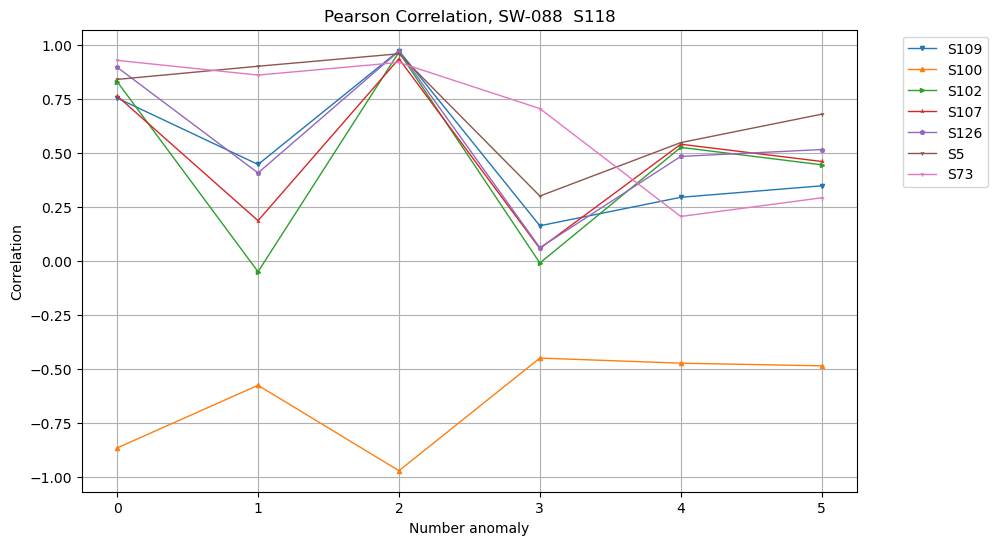

42


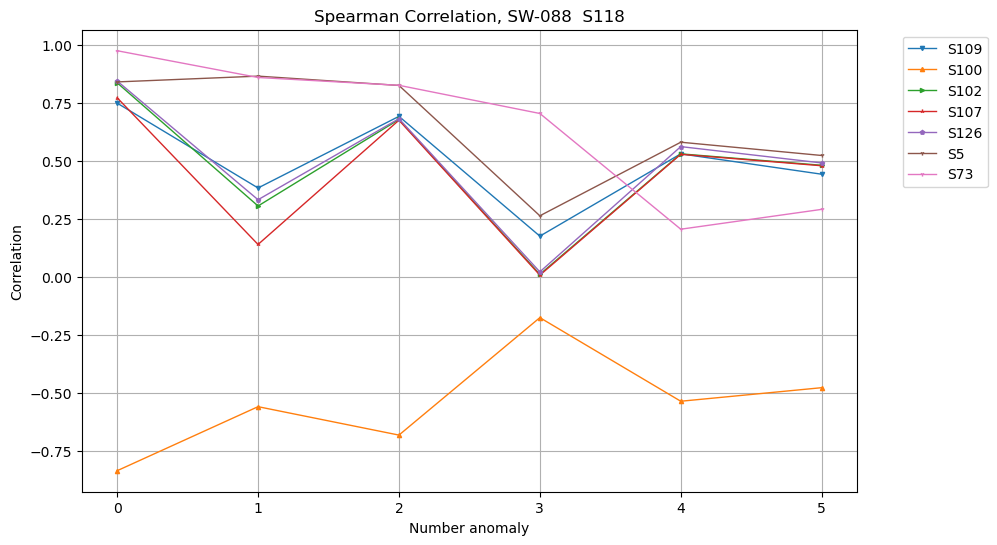

42


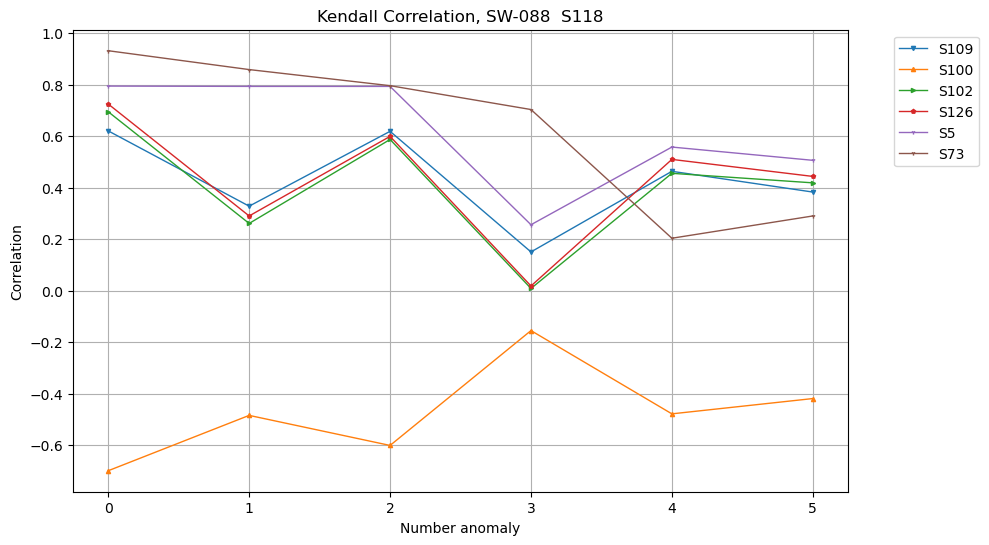

In [106]:
read_and_plot(file_path, 'Pearson', hardware, engine)
read_and_plot(file_path, 'Spearman', hardware, engine)
read_and_plot(file_path, 'Kendall', hardware, engine)

In [ ]:
#088-169
df = dd.read_csv(path)


metrics = ['S130','S171','S172','S173','S174','S179','S183','S204','S205','S206'] #binary circ2